# ***Telecom Churn Case Study***

## **Table of content**
## **1. Problem Statement**
## **2. Importing Liberary and adding dataset**
## **3. Data Cleaning and EDA**
## **4. Defining Churn  variable**
## **5.Deriving new variables to understand the data**
## **6.Data Imbalance Handling**
## **7.Logistic Regression**
## **8.Making predictions on the test set**
## **9.Explaining the results**

## **1. Problem Statement**
#### ***Business problem overview***<br>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

#### ***Understanding and defining churn***<br>
There are two main models of payment in the telecom industry - **`postpaid`** (customers pay a monthly/annual bill after using the services) and **`prepaid`** (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

*This project is based on the Indian and Southeast Asian market.*

 


### 2. Importing Libraries and dataset.

In [17]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')
import sys
!{sys.executable} -m pip install pandas-profiling

# Importing Pandas EDA tool
import pandas_profiling as pp
from pandas_profiling import ProfileReport

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [18]:
# Reading the csv data file.
telecom_data = pd.read_csv(r"C:\Users\vivek\Documents\upgrad\Advance ML\Telecome churn case study\Final\telecom_churn_data.csv")

In [20]:
# Displaying the first 10 field with all columns in the dataset
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [21]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [22]:
# Checking the dimensions of the dataset
telecom_data.shape

(99999, 226)

In [23]:
# Checking the informations regarding the dataset
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

##### This telecom dataset has 99999 rows and 226 columns

### Checking the terms used in the data from data dictionary provided.

In [24]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_excel(r"C:\Users\vivek\Documents\upgrad\Advance ML\Telecome churn case study\Final\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [25]:
# Displaying the dictionary items
telecom_data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### 3. Data Cleaning and EDA

In [26]:
# Statistical analysis of the numercial features
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [27]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

telecom_data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [28]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 210)

In [29]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

**As we can see that the columns with datetime values represented as object, they can be converted into datetime format**

In [30]:
# selecting all the columns with datetime format
date_col= telecom_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])

# Current dimension of the dataset
telecom_data.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [31]:
# confirming the conversion of dtype
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

### Handling missing values

#### Handling missing values of meaningful attribute column

In [33]:
# Handling missing values with respect to `data recharge` attributes
telecom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0


* Let us conside the column `date_of_last_rech_data` indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the `total_rech_data` and the `max_rech_data` also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing.<br> 
* Hence imputing 0 as their values.<br>
* Meaningfull missing in this case represents the the customer has not done any recharge for mobile interenet.

#### Handling the missing values for the attributes `count_rech_2g_*`,`count_rech_3g_*` for month 6,7,8 and 9

In [35]:
# Checking the related columns values
telecom_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


*From the above tablular the column values of `total_rech_data` for each month from 6 to 9 respectively is the sum of the columns values of `count_rech_2g` for each month from 6 to 9 respectively and `count_rech_3g` for each month from 6 to 9 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns `count_rech_2g` for each month from 6 to 9 respectively and `count_rech_3g` for each month from 6 to 9 respectively.*

In [36]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [37]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 202)

#### Handling the missing values for the attributes `arpu_3g_*`,`arpu_2g_*` for month 6,7,8 and 9

In [38]:
# Checking the related columns values
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [39]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", telecom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.932232   0.809695          
arpu_2g_6           0.932232   1.000000   0.834065          
av_rech_amt_data_6  0.809695   0.834065   1.000000          

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.930366   0.796131          
arpu_2g_7           0.930366   1.000000   0.815933          
av_rech_amt_data_7  0.796131   0.815933   1.000000          

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924925   0.787165          
arpu_2g_8           0.924925   1.000000   0.805482          
av_rech_amt_data_8  0.787165   0.805482   1.000000          

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.852253   0.722932          
arpu_2g_9      

From the above correlation table between attributes `arpu_2g_*` and `arpu_3g_*` for each month from 6 to 9 respectively is highly correlated to the attribute `av_rech_amt_data_*` for each month from 6 to 9 respectively.<br> Considering the high correlation between them, it is safer to drop the attributes `arpu_2g_*` and `arpu_3g_*`.

In [40]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
telecom_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")



The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [41]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 194)

#### Handling the other attributes with higher missing value percentage

The column `fb_user_*` and `night_pck_user_*` for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [42]:
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



In [43]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 186)

#### Handling the missing values for the attributes `av_rech_amt_data_*` for month 6,7,8 and 9

In [44]:
# Checking the related columns values
telecom_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


From the above tabular it is deduced that the missing values for the column `av_rech_amt_data_*` for each month from 6 to 9 can be replaced as 0 if the `total_rech_data_*` for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [45]:
# Code for conditional imputation
start_time = time.time()
for i in range(len(telecom_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(telecom_data['av_rech_amt_data_9'][i]) and (telecom_data['total_rech_data_9'][i]==0)):
        telecom_data['av_rech_amt_data_9'][i] = 0


end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


Execution Time =  62.48 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [46]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
av_rech_amt_data_6          73.58
max_rech_data_6             73.58
total_rech_data_6           73.58
total_rech_data_7           73.17
av_rech_amt_data_7          73.17
max_rech_data_7             73.17
av_rech_amt_data_9          72.81
max_rech_data_9             72.81
total_rech_data_9           72.81
av_rech_amt_data_8          72.40
total_rech_data_8           72.40
max_rech_data_8             72.40
isd_ic_mou_9                7.75 
loc_og_mou_9                7.75 
spl_ic_mou_9                7.75 
std_og_t2t_mou_9            7.75 
std_og_t2m_mou_9            7.75 
std_og_t2f_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_og_mou_9                7.75 
std_ic_t2m_mou_9            7.75 
isd_og_mou_9                7.75 
std_ic_t2t_mou_9            7.75 
spl_og_mou_9                7.75 
og_others_9                 7.75 
loc_ic_mou_9  

In [47]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


<br><br>From the above results, we can conclude, the `date_of_last_rech_data_*` corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of of columns `total_rech_data_*`,` max_rech_data_*`are completes.<br>Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [48]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



**As we can no more utilise the datetime column, we can drop the `date_of_last_rech_data_*` column corresponding to months 6,7,8 and 9 respectively.**

In [49]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [50]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 178)

***Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column***

### Filtering the High Value Customer from Good Phase

In [51]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  1153.0 



In [52]:
# The curent dimension of the dataset
telecom_data.shape

(5995, 183)

The total number of customers is now limited to ~30k who lies under the High Value customer criteria basen upon which the model is built. 

In [53]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_9       16.48
max_rech_data_9          16.48
total_rech_data_9        16.48
max_rech_data_8          11.24
total_rech_data_8        11.24
av_rech_amt_data_8       11.24
og_others_9              5.62 
std_og_t2m_mou_9         5.62 
loc_ic_t2f_mou_9         5.62 
loc_og_t2m_mou_9         5.62 
loc_ic_t2m_mou_9         5.62 
loc_ic_t2t_mou_9         5.62 
loc_og_t2f_mou_9         5.62 
spl_og_mou_9             5.62 
loc_og_t2c_mou_9         5.62 
std_ic_t2t_mou_9         5.62 
loc_og_mou_9             5.62 
isd_og_mou_9             5.62 
std_og_mou_9             5.62 
std_og_t2t_mou_9         5.62 
std_og_t2f_mou_9         5.62 
loc_ic_mou_9             5.62 
loc_og_t2t_mou_9         5.62 
ic_others_9              5.62 
std_ic_t2m_mou_9         5.62 
std_ic_t2f_mou_9         5.62 
onnet_mou_9              5.62 
roam_ic_mou_9            5.62 
isd_ic_mou_9             5.62 
std_ic_mou_9             5.62 
roam_og_mou_9            5.62 
offnet_mou_9             5.62 
spl_ic_m

*** The remaining attributes with missing value can be imputed using the advanced imputation technique like `KNNImputer`.***

In [54]:
# Numerical columns available
num_col = telecom_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [55]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
telecom_data[num_col]=scalar.fit_transform(telecom_data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time=time.time()

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_data[num_col]))
telecom_data_knn.columns=telecom_data[num_col].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  5.58 seconds



In [56]:
# check for any null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()

0

The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [57]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
    #we can restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
telecom_data[num_col]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,524.793333,453.43,567.16,325.91,202.726667,16.23,33.49,31.64,4.596667,23.74,12.59,38.06,20.753333,51.39,31.38,40.28,292.536667,308.63,447.38,162.28,133.553333,62.13,55.14,53.23,15.66,0.00,0.00,0.00,3.803333,422.16,533.91,255.79,441.766667,4.30,23.29,12.01,212.236667,49.89,31.76,49.14,22.203333,6.66,20.08,16.68,0.363333,60.86,75.14,77.84,234.813333,0.00,0.18,10.01,0.00,4.50,0.00,6.50,30.18,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,108.82,217.56,221.49,121.19,35.843333,152.16,101.46,39.53,16.016667,427.88,355.23,188.04,160.693333,36.89,11.83,30.39,6.176667,91.44,126.99,141.33,9.196667,52.19,34.24,22.21,1.053333,180.54,173.08,193.94,16.43,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.243333,2.06,14.53,31.59,0.00,15.74,15.19,15.14,2.153333,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,1185.0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,

In [58]:
# Checking the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

In [59]:
# Reconfirming for missing values if any
telecom_data.isnull().sum().sum()

0

### ***4. Defining Churn  variable***


As explained above in the introduction, we are deriving based on usage based for this model.

For that, we need to find the derive churn variable using `total_ic_mou_9`,`total_og_mou_9`,`vol_2g_mb_9` and `vol_3g_mb_9` attributes

In [60]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 7 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  5995 non-null   float64
 1   total_og_mou_9  5995 non-null   float64
 2   vol_2g_mb_9     5995 non-null   float64
 3   vol_3g_mb_9     5995 non-null   float64
dtypes: float64(4)
memory usage: 234.2 KB


In [61]:
# Initializing the churn variable.
telecom_data['churn']=0

# Imputing the churn values based on the condition
telecom_data['churn'] = np.where(telecom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [62]:
# Checking the top 10 data
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,524.793333,453.43,567.16,325.91,202.726667,16.23,33.49,31.64,4.596667,23.74,12.59,38.06,20.753333,51.39,31.38,40.28,292.536667,308.63,447.38,162.28,133.553333,62.13,55.14,53.23,15.66,0.00,0.0,0.00,3.803333,422.16,533.91,255.79,441.766667,4.30,23.29,12.01,212.236667,49.89,31.76,49.14,22.203333,6.66,20.08,16.68,0.363333,60.86,75.14,77.84,234.813333,0.00,0.18,10.01,0.00,4.50,0.00,6.50,30.18,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,108.82,217.56,221.49,121.19,35.843333,152.16,101.46,39.53,16.016667,427.88,355.23,188.04,160.693333,36.89,11.83,30.39,6.176667,91.44,126.99,141.33,9.196667,52.19,34.24,22.21,1.053333,180.54,173.08,193.94,16.43,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.243333,2.06,14.53,31.59,0.00,15.74,15.19,15.14,2.153333,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,1185.0,1
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.0

0    94.69558
1    5.30442 
Name: churn, dtype: float64


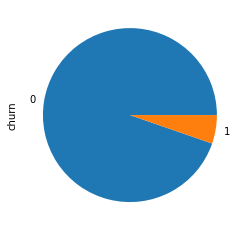

In [63]:
# lets find out churn/non churn percentage
print((telecom_data['churn'].value_counts()/len(telecom_data))*100)
((telecom_data['churn'].value_counts()/len(telecom_data))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 91% of the customers do not churn, there is a possibility of class imbalance*** <br>

Since this variable `churn` is the target variable, all the columns relating to this variable(i.e. all columns with suffix `_9`) can be dropped forn the dataset.

In [64]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in telecom_data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [65]:
# Dropping the selected churn phase columns
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_data.shape

(5995, 141)

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.



In [66]:
# telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
# telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9
# telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
# telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

telecom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

*We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.*

<br>**Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.**<br>

In [67]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_data.columns if '_6' in col]
mon_7_cols = [col for col in telecom_data.columns if '_7' in col]
mon_8_cols = [col for col in telecom_data.columns if '_8' in col]

In [68]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8                0.963629
og_others_8       og_others_7           0.953173
total_ic_mou_6    loc_ic_mou_6          0.902255
loc_og_t2t_mou_8  loc_og_t2t_mou_7      0.895630
total_ic_mou_8    loc_ic_mou_8          0.882876
loc_og_mou_8      loc_og_mou_7          0.880056
total_ic_mou_7    loc_ic_mou_7          0.874992
loc_ic_mou_8      loc_ic_t2m_mou_8      0.871465
sachet_2g_8       total_rech_data_8     0.868415
loc_ic_mou_7      loc_ic_t2m_mou_7      0.866089
loc_ic_mou_6      loc_ic_t2m_mou_6      0.865597
onnet_mou_8       onnet_mou_7           0.858158
loc_og_t2m_mou_8  loc_og_t2m_mou_7      0.839978
total_og_mou_8    total_og_mou_7        0.835987
loc_ic_mou_7      loc_ic_mou_6          0.835982
loc_ic_mou_8      loc_ic_mou_7          0.835943
avg_rech_amt_6_7  overall_rech_amt_6    0.827076
std_og_t2f_mou_8  std_og_t2f_mou_7      0.826097
total_ic_mou_8    total_ic_mou_7        0.825780
loc_og_mou_7      loc_og_mou_6          0.823260
std_og_mou_7      st

In [69]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_data.drop(col_to_drop, axis=1, inplace=True)

In [70]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(5995, 121)

### 5.Deriving new variables to understand the data


In [71]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)

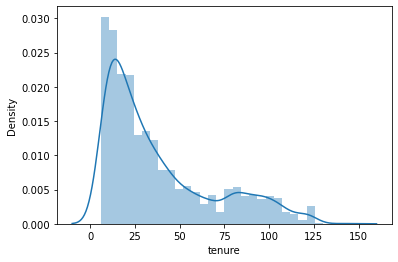

In [72]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_data['tenure'],bins=30)
plt.show()

In [73]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

7     2-5 Yrs
33    2-5 Yrs
48    2-5 Yrs
53    1-2 Yrs
56    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

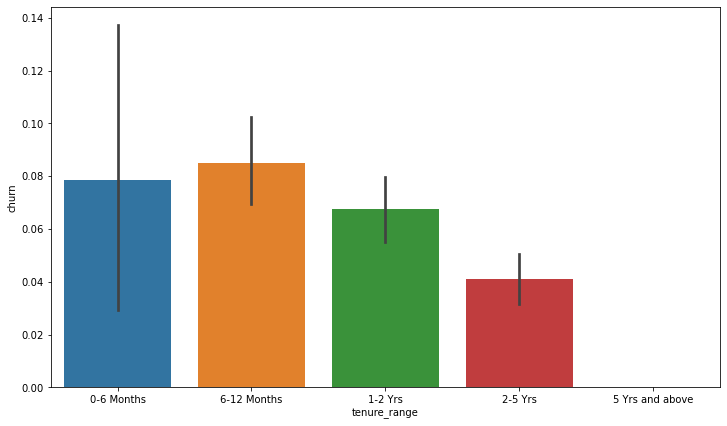

In [74]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_data)
plt.show()

**It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.**

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [75]:
telecom_data["avg_arpu_6_7"]= (telecom_data['arpu_6']+telecom_data['arpu_7'])/2
telecom_data['avg_arpu_6_7'].head()

7     1209.5150
33    1669.9265
48    1224.5990
53    1059.6865
56    386.5860 
Name: avg_arpu_6_7, dtype: float64

In [76]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

telecom_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(5995, 121)

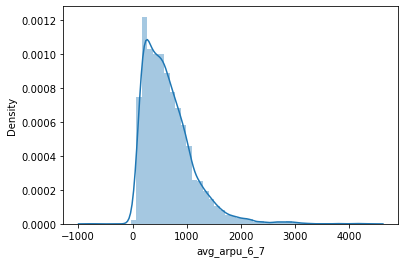

In [77]:
# Visualizing the column created
sns.distplot(telecom_data['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

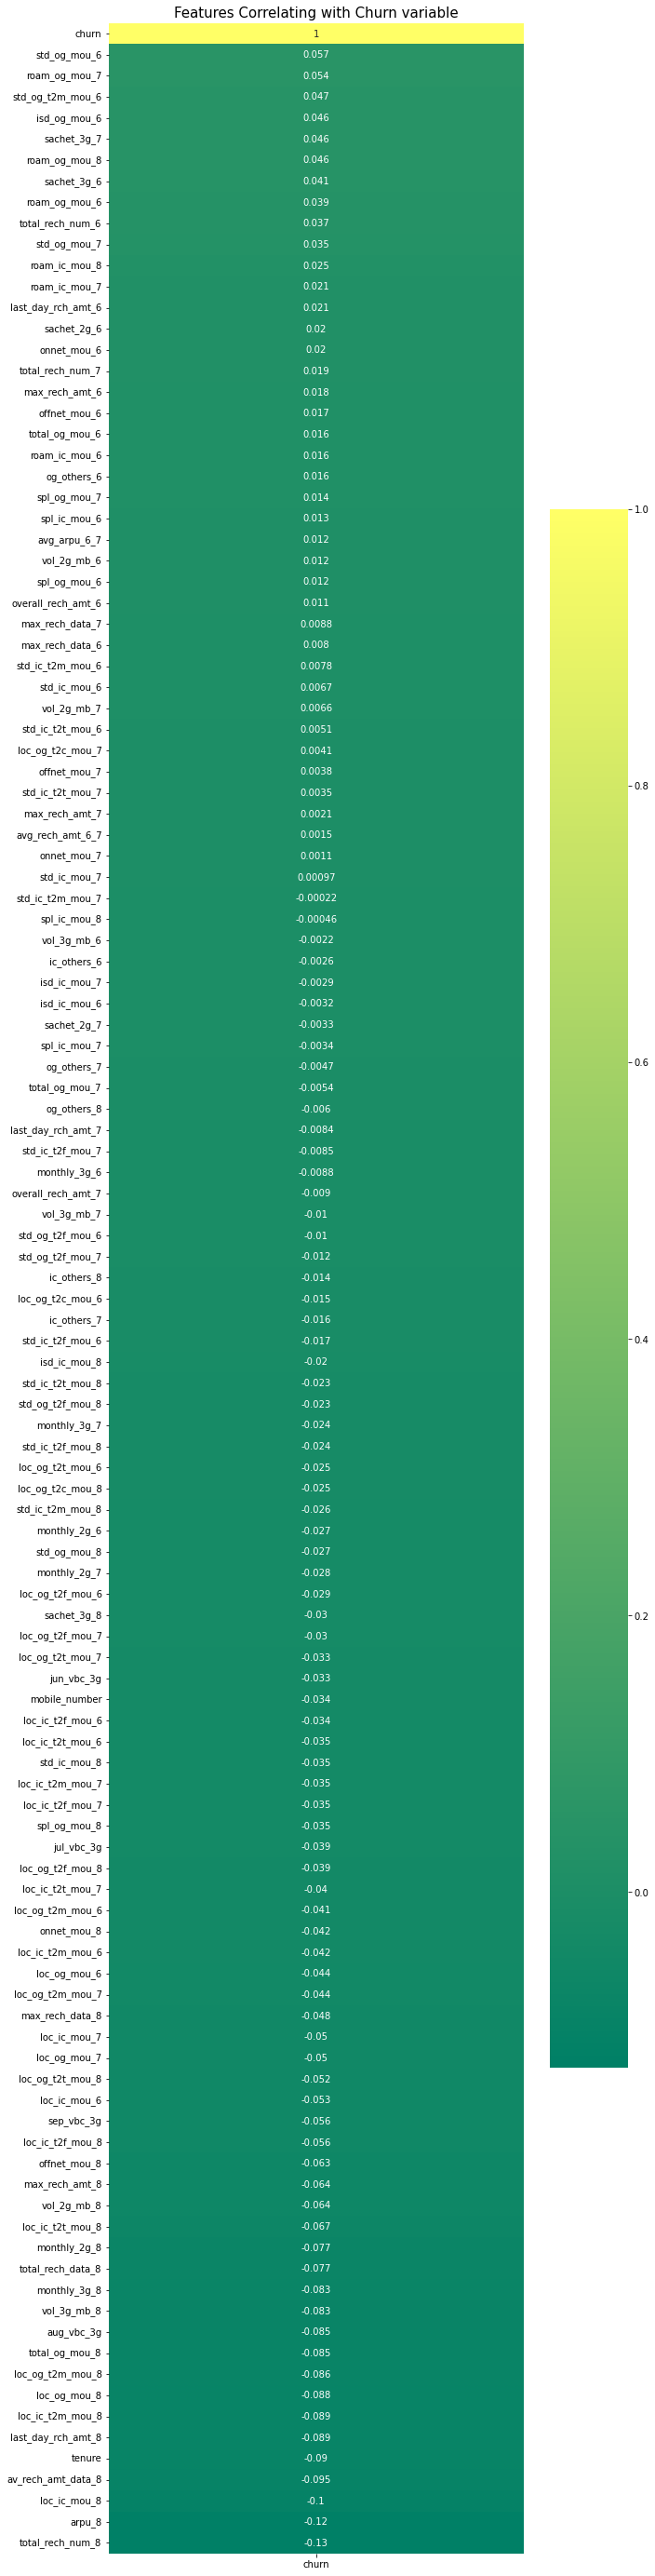

In [78]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)


- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

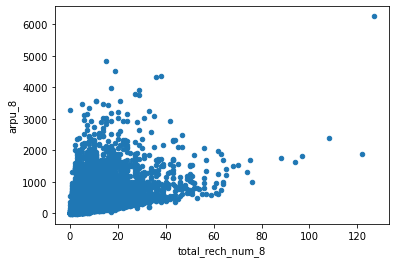

In [80]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

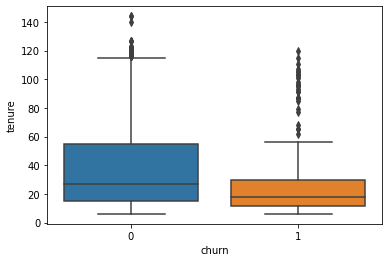

In [81]:
sns.boxplot(x = telecom_data.churn, y = telecom_data.tenure)

plt.show()

**From the above plot , its clear tenured customers do no churn and they keep availing telecom services**

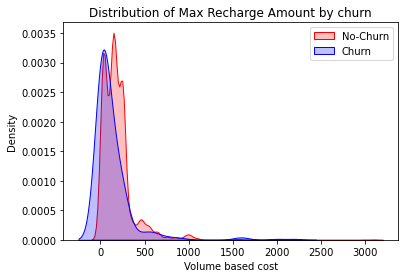

In [82]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

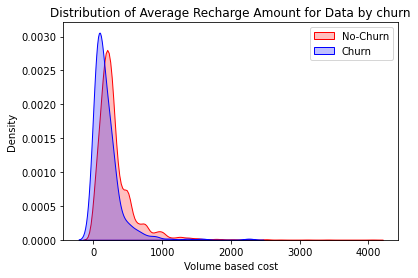

In [83]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [84]:
# Creating categories for month 8 column totalrecharge and their count
telecom_data['total_rech_data_group_8']=pd.cut(telecom_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data['total_rech_num_group_8']=pd.cut(telecom_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     5477
10-25_Recharges    458 
>25_Recharges      32  
No_Recharge        28  
Name: total_rech_data_group_8, dtype: int64


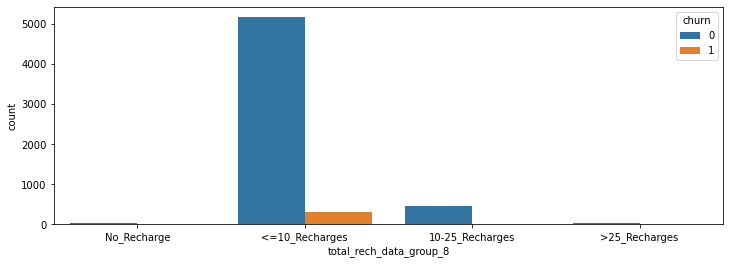

					Distribution of total_rech_num_8 variable
 <=10_Recharges     3369
10-25_Recharges    2131
>25_Recharges      440 
No_Recharge        55  
Name: total_rech_num_group_8, dtype: int64


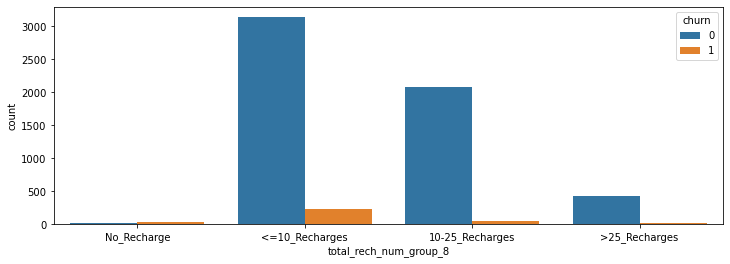

In [85]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_data['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [86]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
7,0,0,0,1,0,0,0,0,1,0
33,1,0,0,1,0,0,0,0,1,0
48,0,0,0,1,0,0,0,0,1,0
53,1,0,0,0,1,0,0,1,0,0
56,0,1,0,0,1,0,0,1,0,0


In [87]:
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
7,7.000702e+09,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,1580.0,790.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
33,7.000150e+09,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7.0,14.0,1.0,252.0,1255.0,455.0,252.0,0.0,455.0,1.0,252.0,1255.0,455.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,0.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,1.0,3.0,0.0,358.10,2706.83,1714.67,0.0,6343.0,23230.0,14786.5,0,44.0,2-5 Yrs,1669.9265,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
48,7.000294e+09,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,0.00,0.00,0.00,0.00,0.00,611.18,154.56,29.31,1012.04,188.83,65.58,19.34,3.68,0.80,0.06,0.0,0.00,1642.58,347.08,95.69,56.29,0.00,0.00,0.00,1506.81,792.23,129.39,0.00,1.58,1.34,0.00,1.45,0.0,0.0,3152.43,1140.66,225.09,361.94,94.19,40.26,842.49,365.69,113.99,7.94,0.25,0.00,1212.39,460.14,154.26,19.24,46.38,13.36,18.91,9.89,3.51,0.00,0.00,0.00,38.16,56.28,16.88,0.00,0.0

In [88]:
# Creating a copy of the filtered dataframe

df=telecom_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [89]:
# Cheking the dataset
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7.0,14.0,1.0,252.0,1255.0,455.0,252.0,0.0,455.0,1.0,252.0,1255.0,455.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,0.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,1.0,3.0,0.0,358.10,2706.83,1714.67,6343.0,23230.0,14786.5,0,1669.9265,1,0,0,1,0,0,0,0,1,0
48,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,0.00,0.00,0.00,0.00,0.00,611.18,154.56,29.31,1012.04,188.83,65.58,19.34,3.68,0.80,0.06,0.0,0.00,1642.58,347.08,95.69,56.29,0.00,0.00,0.00,1506.81,792.23,129.39,0.00,1.58,1.34,0.00,1.45,0.0,0.0,3152.43,1140.66,225.09,361.94,94.19,40.26,842.49,365.69,113.99,7.94,0.25,0.00,1212.39,460.14,154.26,19.24,46.38,13.36,18.91,9.89,3.51,0.00,0.00,0.00,38.16,56.28,16.88,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,13.0,5.0,3.0,250.0,250.0,130.0,250.0,110.0,130.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2317.0,580.0,1448.5,0,1224.59

In [90]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [91]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7.0,14.0,1.0,252.0,1255.0,455.0,252.0,0.0,455.0,1.0,252.0,1255.0,455.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,0.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,1.0,3.0,0.0,358.10,2706.83,1714.67,6343.0,23230.0,14786.5,1669.9265,1,0,0,1,0,0,0,0,1,0
48,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,0.00,0.00,0.00,0.00,0.00,611.18,154.56,29.31,1012.04,188.83,65.58,19.34,3.68,0.80,0.06,0.0,0.00,1642.58,347.08,95.69,56.29,0.00,0.00,0.00,1506.81,792.23,129.39,0.00,1.58,1.34,0.00,1.45,0.0,0.0,3152.43,1140.66,225.09,361.94,94.19,40.26,842.49,365.69,113.99,7.94,0.25,0.00,1212.39,460.14,154.26,19.24,46.38,13.36,18.91,9.89,3.51,0.00,0.00,0.00,38.16,56.28,16.88,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,13.0,5.0,3.0,250.0,250.0,130.0,250.0,110.0,130.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2317.0,580.0,1448.5,1224.5990,0,0,0,1,0

In [92]:
# lets create y dataset for model building.
y=df['churn']
y.head()

7     1
33    0
48    0
53    0
56    0
Name: churn, dtype: int32

In [93]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (4196, 126)
Dimension of X_test: (1799, 126)


In [94]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 29672 to 86113
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   l

In [95]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [96]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [97]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
29672,0.034225,0.005824,0.002367,0.002627,0.017093,0.007269,0.003033,0.0,0.0,0.000000,0.0,0.0,0.000000,0.007327,0.003030,0.003759,0.017663,0.006693,0.008916,0.017181,0.033113,0.000000,0.061874,0.000000,0.0,0.022872,0.008285,0.008714,0.000161,0.0,0.0,0.0,0.000131,0.000476,0.000000,0.0,0.017683,0.000000,0.000000,0.000000,0.0,0.0,0.020493,0.006889,0.005277,0.007996,0.003658,0.006514,0.014657,0.004830,0.006970,0.000000,0.000177,0.000000,0.019263,0.007304,0.011622,0.000000,0.000000,0.000000,0.000167,0.000457,0.000000,0.0,0.0,0.000000,0.000150,0.000264,0.000000,0.022773,0.000000,0.0,0.0,0.0,0.0,0.000950,0.0,0.009662,0.052174,0.054545,0.015748,0.084000,0.081290,0.049677,0.120000,0.073333,0.049677,0.016667,0.162058,0.162058,0.099035,0.045082,0.004179,0.037655,0.000910,0.103063,0.055960,0.010792,0.00,0.4,0.2,0.000000,0.000000,0.142857,0.0625,0.000,0.000000,0.000000,0.000000,0.021011,0.095891,0.128959,0.016589,0.042621,0.016444,0.159393,1,0,0,1,0,0,0,1,0,0
60287,0.027025,0.000040,0.000141,0.000751,0.002114,0.005369,0.001423,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000050,0.000180,0.001074,0.001211,0.007439,0.004183,0.006013,0.003547,0.000000,0.028630,0.000000,0.0,0.001434,0.004351,0.003405,0.000135,0.0,0.0,0.0,0.000109,0.000136,0.000000,0.0,0.008182,0.000000,0.000000,0.000000,0.0,0.0,0.001866,0.003505,0.002062,0.000000,0.000580,0.000197,0.007367,0.009181,0.005289,0.008397,0.053479,0.017397,0.008651,0.021193,0.008963,0.000000,0.001400,0.000000,0.000465,0.000000,0.000000,0.0,0.0,0.000000,0.000418,0.001372,0.000000,0.005567,0.008439,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.139130,0.181818,0.094488,0.008333,0.009677,0.008065,0.011905,0.009524,0.008065,0.116667,0.016077,0.016077,0.016077,0.051230,0.029688,0.025550,0.002338,0.030137,0.019240,0.015675,0.00,0.0,0.0,0.285714,0.250000,0.000000,0.0000,0.000,0.034483,0.000000,0.000000,0.029337,0.064431,0.082051,0.039225,0.069550,0.050380,0.057281,1,0,0,0,1,0,0,1,0,0
76874,0.113618,0.191989,0.121281,0.083860,0.075697,0.0

### 6.Data Imbalance Handling

**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [101]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [102]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (7966, 126)
Dimension of y_train_sm Shape: (7966,)


### 7.Logistic Regression

In [103]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [104]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7966
Model:                            GLM   Df Residuals:                     7840
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 Jan 2023   Deviance:                   1.3272e+05
Time:                        22:20:28   Pearson chi2:                 6.49e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    9.115e+14   7.97e+06   1.14e+08      0.000    9.11e+14    9.11e+14
arpu_8                                  -1.392e+15   3.22e+07  -4.32e+07      0.000   -1.39e+15   -1.39e+15
onnet_mou_6                             -2.405e+17   1.03e+09  -2.33e+08      0.000   -2.41e+17   -2.41e+17
onnet_mou_7                             -1.587e+16   6.65e+08  -2.39e+07      0.000   -1.59e+16   -1.59e+16
onnet_mou_8                              1.509e+17    3.5e+08   4.31e+08      0.000    1.51e+17    1.51e+17
offnet_mou_6                            -1.967e+17   8.93e+08   -2.2e+08      0.000   -1.97e+17   -1.97e+17
offnet_mou_7                            -9.134e+15    4.2e+08  -2.17e+07      0.000   -9.13e+15   -9.13e+15
offnet_mou_8                              1.74e+17   4.03e+08   4.32e+08      0.000    1.74e+17    1.74e+17
roam_ic_mou_6                            1.033e+15   2.61e+07   3.96e+07      0.000    1.03e+15    1.03e+15
roam_ic_mou_7                            -2.34e+15   3.11e+07  -7.52e+07      0.000   -2.34e+15   -2.34e+15
roam_ic_mou_8                           -2.718e+15   3.27e+07  -8.31e+07      0.000   -2.72e+15   -2.72e+15
roam_og_mou_6                            1.369e+17   5.96e+08    2.3e+08      0.000    1.37e+17    1.37e+17
roam_og_mou_7                            4.051e+15   1.44e+08   2.81e+07      0.000    4.05e+15    4.05e+15
roam_og_mou_8                           -5.043e+16   1.16e+08  -4.34e+08      0.000   -5.04e+16   -5.04e+16
loc_og_t2t_mou_6                         6.567e+19   7.99e+11   8.22e+07      0.000    6.57e+19    6.57e+19
loc_og_t2t_mou_7                        -6.385e+19   9.69e+11  -6.59e+07      0.000   -6.38e+19   -6.38e+19
loc_og_t2t_mou_8                        -5.883e+19   7.65e+11  -7.69e+07      0.000   -5.88e+19   -5.88e+19
loc_og_t2m_mou_6                         5.966e+19   7.26e+11   8.22e+07      0.000    5.97e+19    5.97e+19
loc_og_t2m_mou_7                         -3.45e+19   5.23e+11  -6.59e+07      0.000   -3.45e+19   -3.45e+19
loc_og_t2m_mou_8                        -3.323e+19   4.32e+11  -7.68e+07      0.000   -3.32e+19   -3.32e+19
loc_og_t2f_mou_6                         4.139e+18   5.04e+10   8.22e+07      0.000    4.14e+18    4.14e+18
loc_og_t2f_mou_7                        -3.279e+18   4.97e+10  -6.59e+07      0.000   -3.28e+18   -3.28e+18
loc_og_t2f_mou_8                        -4.225e+18    5.5e+10  -7.68e+07      0.000   -4.22e+18   -4.22e+18
loc_og_t2c_mou_6                         -1.55e+14   2.29e+07  -6.75e+06      0.000   -1.55e+14   -1.55e+14
loc_og_t2c_mou_7                        -8.872e+15   5.72e+07  -1.55e+08      0.000   -8.87e+15   -8.87e+15
loc_og_t2c_mou_8                          9.78e+15   5.77e+

#### Logistic Regression using Feature Selection (RFE method)

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)          
rfe = rfe.fit(X_train_sm, y_train_sm)

In [110]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [111]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'loc_og_mou_8', 'isd_og_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')


In [112]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 89),
 ('onnet_mou_7', False, 34),
 ('onnet_mou_8', False, 19),
 ('offnet_mou_6', False, 5),
 ('offnet_mou_7', False, 73),
 ('offnet_mou_8', False, 84),
 ('roam_ic_mou_6', False, 26),
 ('roam_ic_mou_7', False, 47),
 ('roam_ic_mou_8', False, 83),
 ('roam_og_mou_6', False, 43),
 ('roam_og_mou_7', False, 49),
 ('roam_og_mou_8', False, 15),
 ('loc_og_t2t_mou_6', False, 79),
 ('loc_og_t2t_mou_7', False, 81),
 ('loc_og_t2t_mou_8', False, 7),
 ('loc_og_t2m_mou_6', False, 104),
 ('loc_og_t2m_mou_7', False, 94),
 ('loc_og_t2m_mou_8', False, 65),
 ('loc_og_t2f_mou_6', False, 35),
 ('loc_og_t2f_mou_7', False, 100),
 ('loc_og_t2f_mou_8', False, 103),
 ('loc_og_t2c_mou_6', False, 24),
 ('loc_og_t2c_mou_7', False, 54),
 ('loc_og_t2c_mou_8', False, 105),
 ('loc_og_mou_6', False, 95),
 ('loc_og_mou_7', False, 67),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 57),
 ('std_og_t2f_mou_6', False, 99),
 ('std_og_t2f_mou_7', False, 72),
 ('std_og_t2f_m

##### Assessing the model with StatsModels

In [113]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7966
Model:                            GLM   Df Residuals:                     7945
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.6
Date:                Tue, 24 Jan 2023   Deviance:                       6035.2
Time:                        22:29:02   Pearson chi2:                 3.02e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4667
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6879      0.093      7.422      0.000       0.506       0.870
arpu_8                 0.3226      0.912      0.354      0.724      -1.465       2.110
loc_og_mou_8          -7.3895      1.213     -6.093      0.000      -9.767      -5.012
isd_og_mou_6           5.4314      0.888      6.115      0.000       3.690       7.172
loc_ic_t2t_mou_8     -21.2777      3.033     -7.015      0.000     -27.222     -15.333
loc_ic_mou_8          -6.5365      1.088     -6.006      0.000      -8.670      -4.403
std_ic_mou_8         -10.2274      1.744     -5.865      0.000     -13.645      -6.810
spl_ic_mou_8         -12.4366      1.289     -9.645      0.000     -14.964      -9.909
total_rech_num_6       5.2238      0.625      8.359      0.000       3.999       6.449
total_rech_num_7      11.4154      0.772     14.795      0.000       9.903      12.928
total_rech_num_8     -24.9391      1.311    -19.018      0.000     -27.509     -22.369
max_rech_amt_6         9.2445      0.899     10.284      0.000       7.483      11.006
max_rech_amt_7         3.7254      0.758      4.914      0.000       2.239       5.211
last_day_rch_amt_8   -13.3135      1.135    -11.729      0.000     -15.538     -11.089
total_rech_data_8     -3.8930      0.928     -4.195      0.000      -5.712      -2.074
vol_2g_mb_8           -5.5856      1.291     -4.328      0.000      -8.115      -3.056
vol_3g_mb_7            9.0825      1.102      8.239      0.000       6.922      11.243
vol_3g_mb_8          -11.0270      1.732     -6.367      0.000     -14.422      -7.632
monthly_2g_8          -9.6049      0.741    -12.958      0.000     -11.058      -8.152
monthly_3g_8         -14.9660      1.428    -10.483      0.000     -17.764     -12.168
aug_vbc_3g            -1.6144      0.686     -2.353      0.019      -2.959      -0.270
======================================================================================
"""

In [114]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'loc_og_mou_8', 'isd_og_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')


In [115]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7966
Model:                            GLM   Df Residuals:                     7946
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3046.3
Date:                Tue, 24 Jan 2023   Deviance:                       6092.6
Time:                        22:29:07   Pearson chi2:                 3.10e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4628
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6982      0.092      7.556      0.000       0.517       0.879
arpu_8                 0.1193      0.907      0.132      0.895      -1.658       1.897
loc_og_mou_8          -8.7429      1.254     -6.971      0.000     -11.201      -6.285
isd_og_mou_6           5.4813      0.922      5.942      0.000       3.673       7.289
loc_ic_mou_8         -11.0507      1.037    -10.655      0.000     -13.084      -9.018
std_ic_mou_8         -10.2994      1.728     -5.960      0.000     -13.686      -6.913
spl_ic_mou_8         -12.3356      1.274     -9.683      0.000     -14.832      -9.839
total_rech_num_6       5.2924      0.621      8.522      0.000       4.075       6.510
total_rech_num_7      10.7483      0.753     14.275      0.000       9.273      12.224
total_rech_num_8     -24.6091      1.301    -18.915      0.000     -27.159     -22.059
max_rech_amt_6         9.2350      0.905     10.208      0.000       7.462      11.008
max_rech_amt_7         3.7387      0.784      4.766      0.000       2.201       5.276
last_day_rch_amt_8   -13.2653      1.130    -11.740      0.000     -15.480     -11.051
total_rech_data_8     -3.8471      0.925     -4.160      0.000      -5.660      -2.035
vol_2g_mb_8           -4.9037      1.271     -3.859      0.000      -7.394      -2.413
vol_3g_mb_7            9.0236      1.106      8.162      0.000       6.857      11.190
vol_3g_mb_8          -10.9192      1.725     -6.329      0.000     -14.301      -7.538
monthly_2g_8          -9.4072      0.732    -12.845      0.000     -10.843      -7.972
monthly_3g_8         -15.1393      1.421    -10.653      0.000     -17.925     -12.354
aug_vbc_3g            -1.4836      0.685     -2.167      0.030      -2.825      -0.142
======================================================================================
"""

In [157]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' 
rfe_columns_2=rfe_columns_1.drop('loc_ic_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'loc_og_mou_8', 'isd_og_mou_6', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'aug_vbc_3g'],
      dtype='object')


In [158]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7966
Model:                            GLM   Df Residuals:                     7947
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3123.9
Date:                Tue, 24 Jan 2023   Deviance:                       6247.8
Time:                        22:53:30   Pearson chi2:                 3.26e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4523
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5947      0.091      6.535      0.000       0.416       0.773
arpu_8                 0.7133      0.895      0.797      0.425      -1.040       2.467
loc_og_mou_8         -17.7181      1.112    -15.939      0.000     -19.897     -15.539
isd_og_mou_6           4.9533      0.836      5.929      0.000       3.316       6.591
std_ic_mou_8         -11.3689      1.751     -6.491      0.000     -14.802      -7.936
spl_ic_mou_8         -12.0898      1.246     -9.703      0.000     -14.532      -9.648
total_rech_num_6       4.9509      0.609      8.135      0.000       3.758       6.144
total_rech_num_7      10.7011      0.739     14.490      0.000       9.254      12.149
total_rech_num_8     -24.2386      1.280    -18.934      0.000     -26.748     -21.729
max_rech_amt_6         9.2266      0.892     10.342      0.000       7.478      10.975
max_rech_amt_7         3.4729      0.773      4.491      0.000       1.957       4.989
last_day_rch_amt_8   -13.9677      1.123    -12.440      0.000     -16.168     -11.767
total_rech_data_8     -4.5845      0.922     -4.970      0.000      -6.392      -2.777
vol_2g_mb_8           -5.4392      1.274     -4.269      0.000      -7.937      -2.942
vol_3g_mb_7            9.7511      1.105      8.824      0.000       7.585      11.917
vol_3g_mb_8          -11.2642      1.728     -6.518      0.000     -14.652      -7.877
monthly_2g_8          -9.5494      0.721    -13.253      0.000     -10.962      -8.137
monthly_3g_8         -15.3337      1.406    -10.904      0.000     -18.090     -12.578
aug_vbc_3g            -1.9684      0.692     -2.845      0.004      -3.325      -0.612
======================================================================================
"""

In [159]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([4.20683559e-01, 5.74805695e-01, 6.46970999e-01, 8.38071381e-04,
       4.77128635e-01, 4.79881750e-02, 6.85772843e-03, 3.21778167e-02,
       7.75777613e-01, 8.98470220e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [160]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.420684
1,0,0.574806
2,0,0.646971
3,0,0.000838
4,0,0.477129


##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [161]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.420684,0
1,0,0.574806,1
2,0,0.646971,1
3,0,0.000838,0
4,0,0.477129,0


In [162]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[3216  767]
 [ 534 3449]]


In [163]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [164]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8366808937986442


In [165]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [166]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,max_rech_amt_7,7.78
8,max_rech_amt_6,7.02
0,arpu_8,6.38
7,total_rech_num_8,5.62
16,monthly_3g_8,4.40
11,total_rech_data_8,3.91
10,last_day_rch_amt_8,3.62
13,vol_3g_mb_7,3.47
4,spl_ic_mou_8,3.43
15,monthly_2g_8,3.30


#### Metrics beyond simply accuracy

In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8659302033642983
Specificity =  0.8074315842329902
False Positive Rate =  0.19256841576700978
Precision =  0.8180740037950665
True Negative Prediction Rate =  0.8576


#### Plotting the ROC Curve

In [169]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

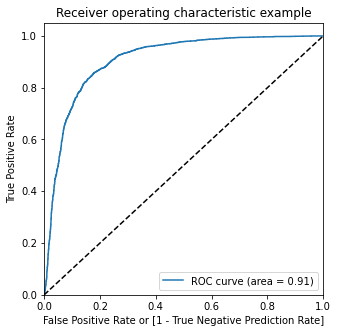

In [171]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [172]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.420684,0,1,1,1,1,1,0,0,0,0,0
1,0,0.574806,1,1,1,1,1,1,1,0,0,0,0
2,0,0.646971,1,1,1,1,1,1,1,1,0,0,0
3,0,0.000838,0,1,0,0,0,0,0,0,0,0,0
4,0,0.477129,0,1,1,1,1,1,0,0,0,0,0


In [173]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.714662  0.983932     0.445393   
0.2  0.2          0.773286  0.965604     0.580969   
0.3  0.3          0.810947  0.944514     0.677379   
0.4  0.4          0.830530  0.908361     0.752699   
0.5  0.5          0.836681  0.865930     0.807432   
0.6  0.6          0.835551  0.809942     0.861160   
0.7  0.7          0.810193  0.717299     0.903088   
0.8  0.8          0.748682  0.556365     0.940999   
0.9  0.9          0.633317  0.290987     0.975646   


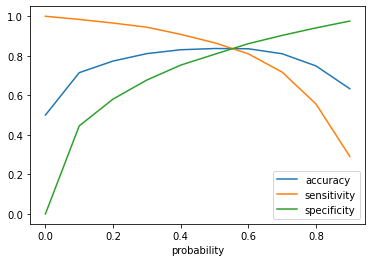

In [174]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimm point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [175]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.420684,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.574806,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0
2,0,0.646971,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
3,0,0.000838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.477129,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [176]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.836681  0.865930     0.807432   
0.51  0.51         0.838062  0.861913     0.814210   
0.52  0.52         0.838940  0.858147     0.819734   
0.53  0.53         0.838438  0.851619     0.825257   
0.54  0.54         0.838313  0.846849     0.829777   
0.55  0.55         0.838313  0.842832     0.833794   
0.56  0.56         0.837936  0.837811     0.838062   
0.57  0.57         0.838564  0.833291     0.843836   
0.58  0.58         0.837434  0.826011     0.848858   
0.59  0.59         0.837057  0.818479     0.855636   


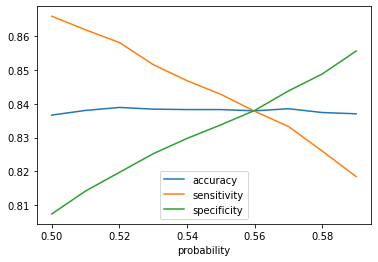

In [177]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [178]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.420684,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.574806,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1
2,0,0.646971,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
3,0,0.000838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.477129,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8383128295254832


In [180]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[3305  678]
 [ 610 3373]]


In [181]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8468491087120261
Specificity =  0.8297765503389405
False Positive Rate =  0.1702234496610595
Precision =  0.832633917551222
True Negative Prediction Rate =  0.8441890166028098


#### Precision and recall tradeoff

In [182]:
from sklearn.metrics import precision_recall_curve

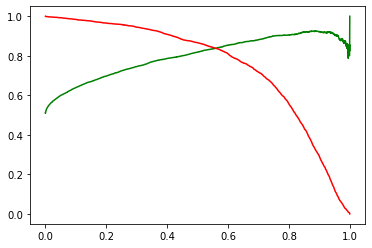

In [183]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 8.Making predictions on the test set

**Transforming and feature selection for test data**

In [184]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
1200,0.001811,4.960947e-06,5.267668e-06,2.745238e-05,0.000010,1.224920e-05,6.157775e-06,0.000062,0.0,0.000002,0.000002,0.0,0.000003,7.116675e-06,8.590929e-06,5.498797e-05,0.000012,2.394169e-05,0.000037,0.000263,0.000410,0.000811,0.000000,0.0,0.0,0.000016,1.641347e-05,0.000070,1.267495e-07,0.000017,0.000000,0.000000,4.124186e-07,7.006184e-08,5.258264e-07,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000012,9.921513e-06,2.608053e-05,2.956399e-05,4.028319e-05,6.280782e-05,0.000025,0.000030,0.000034,1.569448e-05,0.000048,1.215410e-04,0.000045,0.000055,0.000072,9.489239e-07,8.362087e-09,5.281711e-07,2.783479e-07,1.605142e-06,1.536151e-06,2.278978e-06,0.000000e+00,0.000000e+00,1.224344e-06,5.435215e-07,0.000002,0.000000,0.0,0.00000,0.000000e+00,0.000000,1.697121e-08,0.0,0.0,0.0,-0.008015,-0.008512,0.000558,0.000028,0.000026,0.000026,0.000057,0.000057,0.000018,0.000556,0.000082,0.000082,0.000072,0.000018,2.340591e-07,3.789231e-08,1.661795e-07,0.000002,1.695423e-06,9.757276e-07,0.0625,0.08,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,4.045199e-06,0.000005,-0.000088,7.015634e-07,-0.01919,0.000064,1,0,0,1,0,0,0,0,0,0
69363,0.001779,5.371050e-06,3.716038e-07,0.000000e+00,0.000002,2.367872e-07,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,6.394867e-07,0.000000e+00,0.000000e+00,0.000001,1.147595e-07,0.000000,0.000000,0.000000,0.000000,0.000087,0.0,0.0,0.000002,3.299873e-08,0.000000,7.429028e-07,0.000000,0.000000,0.000000,5.477479e-06,3.718089e-07,0.000000e+00,0.0,0.000100,0.000039,8.012387e-07,0.000000,0.0,0.0,0.000007,5.125865e-07,1.174053e-08,1.203261e-06,4.118877e-07,1.668770e-07,0.000005,0.000003,0.000001,1.930649e-06,0.000009,3.980750e-06,0.000004,0.000003,0.000002,7.073599e-07,1.271037e-07,1.242832e-06,0.000000e+00,3.303290e-07,2.807587e-08,0.000000e+00,0.000000e+00,0.000000e+00,6.976412e-07,2.321736e-07,0.000001,0.000000,0.0,0.15747,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,-0.008242,

In [185]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,loc_og_mou_8,isd_og_mou_6,std_ic_mou_8,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,aug_vbc_3g
1200,0.001811,0.000070,0.0,0.000002,0.00000,-0.008015,-0.008512,0.000558,0.000028,0.000026,0.000018,0.000556,1.661795e-07,1.695423e-06,9.757276e-07,0.04,0.000000,0.000008
69363,0.001779,0.000000,0.0,0.000001,0.15747,-0.008242,-0.008760,0.000248,0.000017,0.000021,0.000002,0.000556,1.120612e-05,0.000000e+00,0.000000e+00,0.00,0.000000,0.000000
78119,0.001787,0.000017,0.0,0.000002,0.00000,-0.008318,-0.008347,0.000186,0.000022,0.000034,0.000021,0.000278,1.562282e-07,4.928597e-07,6.377618e-07,0.00,0.003906,0.000005
97261,0.001781,0.000002,0.0,0.000002,0.00000,-0.008469,-0.008843,0.000186,0.000017,0.000016,0.000016,0.000556,1.079277e-07,7.120895e-07,6.820164e-07,0.00,0.000000,0.000007
55896,0.001781,0.000002,0.0,0.000004,0.00000,-0.007183,-0.007355,0.000806,0.000003,0.000004,0.000002,0.001389,8.940848e-07,1.315757e-07,3.273429e-07,0.00,0.000000,0.000003


In [186]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

**Predicting the target variable**

In [187]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 1200     0.516502
69363    0.189885
78119    0.598577
97261    0.611191
55896    0.612005
60690    0.612186
77066    0.612266
36058    0.610153
46362    0.517828
71807    0.611860
dtype: float64


In [188]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
1200,0.516502
69363,0.189885
78119,0.598577
97261,0.611191
55896,0.612005


In [189]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [190]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
1200,0
69363,0
78119,0
97261,0
55896,0


In [191]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
1200,0,0.516502
69363,0,0.189885
78119,0,0.598577
97261,0,0.611191
55896,0,0.612005


In [192]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
1200,0,0.516502,0
69363,0,0.189885,0
78119,0,0.598577,1
97261,0,0.611191,1
55896,0,0.612005,1


In [193]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.3151750972762646

**Metrics Evaluation**

In [194]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[ 476 1218]
 [  14   91]]


In [195]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8666666666666667
Specificity =  0.2809917355371901
False Positive Rate =  0.71900826446281
Precision =  0.06951871657754011
True Negative Prediction Rate =  0.9714285714285714


### 9.Explaining the results

In [197]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  32.0 %
The sensitivity of the predicted model is:  87.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



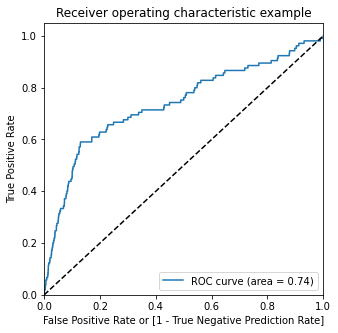

In [198]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

**The AUC score for train dataset is 0.90 and the test dataset is 0.87.<br> This model can be considered as a good model.**

<br>

#### Logistic Regression using PCA

In [199]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (4196, 126)
Dimension of X_test: (1799, 126)
Dimension of X_train_sm Shape: (7966, 126)
Dimension of y_train_sm Shape: (7966,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.034225,0.005824,0.002367,0.002627,0.017093,0.007269,0.003033,0.0,0.0,0.000000,0.0,0.0,0.000000,0.007327,0.003030,0.003759,0.017663,0.006693,0.008916,0.017181,0.033113,0.000000,0.061874,0.000000,0.0,0.022872,0.008285,0.008714,0.000161,0.0,0.0,0.0,0.000131,0.000476,0.000000,0.0,0.017683,0.000000,0.000000,0.000000,0.0,0.0,0.020493,0.006889,0.005277,0.007996,0.003658,0.006514,0.014657,0.004830,0.006970,0.000000,0.000177,0.000000,0.019263,0.007304,0.011622,0.000000,0.000000,0.000000,0.000167,0.000457,0.000000,0.0,0.0,0.000000,0.000150,0.000264,0.000000,0.022773,0.000000,0.0,0.0,0.0,0.0,0.000950,0.0,0.009662,0.052174,0.054545,0.015748,0.084000,0.081290,0.049677,0.120000,0.073333,0.049677,0.016667,0.162058,0.162058,0.099035,0.045082,0.004179,0.037655,0.000910,0.103063,0.055960,0.010792,0.00,0.4,0.2,0.000000,0.000000,0.142857,0.0625,0.000,0.000000,0.000000,0.000000,0.021011,0.095891,0.128959,0.016589,0.042621,0.016444,0.159393,1,0,0,1,0,0,0,1,0,0
1,0.027025,0.000040,0.000141,0.000751,0.002114,0.005369,0.001423,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000050,0.000180,0.001074,0.001211,0.007439,0.004183,0.006013,0.003547,0.000000,0.028630,0.000000,0.0,0.001434,0.004351,0.003405,0.000135,0.0,0.0,0.0,0.000109,0.000136,0.000000,0.0,0.008182,0.000000,0.000000,0.000000,0.0,0.0,0.001866,0.003505,0.002062,0.000000,0.000580,0.000197,0.007367,0.009181,0.005289,0.008397,0.053479,0.017397,0.008651,0.021193,0.008963,0.000000,0.001400,0.000000,0.000465,0.000000,0.000000,0.0,0.0,0.000000,0.000418,0.001372,0.000000,0.005567,0.008439,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.139130,0.181818,0.094488,0.008333,0.009677,0.008065,0.011905,0.009524,0.008065,0.116667,0.016077,0.016077,0.016077,0.051230,0.029688,0.025550,0.002338,0.030137,0.019240,0.015675,0.00,0.0,0.0,0.285714,0.250000,0.000000,0.0000,0.000,0.034483,0.000000,0.000000,0.029337,0.064431,0.082051,0.039225,0.069550,0.050380,0.057281,1,0,0,0,1,0,0,1,0,0
2,0.113618,0.191989,0.121281,0.083860,0.075697,0.048816,0.0302

In [200]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [201]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (7966, 126)
Dimension of X_test_pca:  (1799, 126)


In [202]:
#Viewing the PCA components
pca.components_

array([[ 2.77435706e-02,  1.01410415e-02,  9.54787950e-03, ...,
        -3.04313495e-02,  1.96443375e-01,  3.75764062e-04],
       [-9.89243336e-03,  3.96386695e-03,  4.88445465e-03, ...,
         7.34596890e-01, -6.54747077e-01, -2.13860813e-05],
       [-5.17766192e-03,  1.40233627e-03, -3.54802637e-03, ...,
        -3.67890492e-01, -4.41996190e-01,  3.62178642e-04],
       ...,
       [ 4.24950762e-07,  4.58046272e-05, -4.90470174e-07, ...,
        -1.98259044e-08, -3.39547120e-08,  1.10457367e-07],
       [-1.53749168e-07, -1.56731681e-05,  1.34129348e-05, ...,
        -1.46589215e-08, -3.83584247e-08, -4.34709127e-09],
       [-0.00000000e+00,  1.08337729e-15,  3.98020000e-15, ...,
         2.39775852e-19,  4.23585698e-20,  6.89604938e-17]])

#### Performing Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (1799, 1)


In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[1398  296]
 [  35   70]] 

Accuracy of the logistic regression model with PCA:  0.8160088938299055


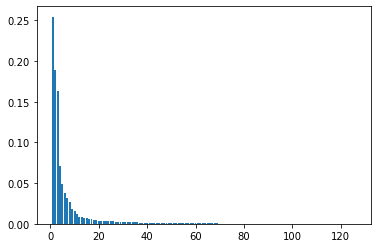

In [205]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

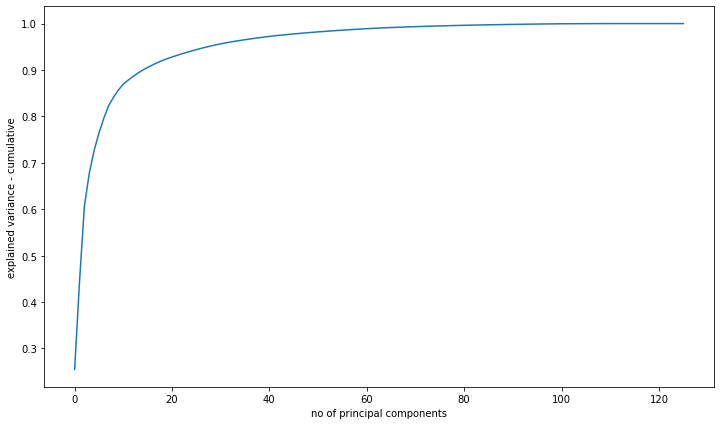

In [206]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [207]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([25.5, 44.4, 60.7, 67.8, 72.7, 76.5, 79.7, 82.4, 84.2, 85.7, 87. ,
       87.9, 88.7, 89.4, 90.1, 90.7, 91.2, 91.7, 92.2, 92.6, 93. , 93.3,
       93.6, 93.9, 94.2, 94.5, 94.8, 95.1, 95.3, 95.5, 95.7, 95.9, 96.1,
       96.3, 96.5, 96.7, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6,
       97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7,
       98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6])

 **90% of the data can be explained with 8 PCA components*

**Fitting the dataset with the 8 explainable components**

In [208]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (7966, 15)
Dimension for Test dataset using PCA:  (1799, 15)


In [209]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (1799, 1)


In [210]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[1330  364]
 [  35   70]] 

Accuracy of the logistic regression model with PCA:  0.7782101167315175


In [211]:
# df_pca = pd.DataFrame(newdata, columns=["PC1", "PC2"])
# df.head()

In [212]:
Customers who churn show lower average monthly local incoming calls from fixed line in the action period by 1.27 standard deviations , 
compared to users who don't churn , when all other factors are held constant. 
This is the strongest indicator of churn. Customers who churn show lower number of recharges done in action period by 1.20 
standard deviations, when all other factors are held constant. This is the second strongest indicator of churn. Further 
customers who churn have done 0.6 standard deviations higher recharge than non-churn customers. This factor when coupled 
with above factors is a good indicator of churn. Customers who churn are more likely to be users of 'monthly 2g package-0 / 
monthly 3g package-0' in action period (approximately 0.3 std deviations higher than other packages), when all other factors
are held constant.

Based on the above indicators the recommendations to the telecom company are :

Concentrate on users with 1.27 std devations lower than average incoming calls from fixed line. 
They are most likely to churn. Concentrate on users who recharge less number of times ( less than 1.2 std deviations compared to avg) in the 8th month. 
They are second most likely to churn. Models with high sensitivity are the best for predicting churn. 
Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.87, test sensitivity of 100%.

SyntaxError: invalid syntax (2064747708.py, line 1)